# Set-up environment

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data

In [7]:
df = pd.read_csv("../Data/cleaned.csv")
df.sample()

,title,description,location,address,street_name,price,area,date,air_conditioning,fridge,washing_machine,mezzanine,kitchen,wardrobe,bed,balcony,elevator,free_time,parking,url
3917,"Cho thuê phòng trọ cho hssv - Lý Chính Thắng, ...",Vị trí siêu thuận tiện ngay trung tâm thành ph...,"Đường Võ Thị Sáu, Phường Võ Thị Sáu, Quận 3, H...",Quận 3 - Hồ Chí Minh,Võ Thị Sáu,6.0,25.0,2025-09-04,1,1,1,1,0,1,1,1,1,1,1,https://phongtro123.com/cho-thue-can-ho-cho-hs...


# I. Dataset Overview


## 1. Basic Information

In [8]:
num_rows, num_cols = df.shape
size = num_rows * num_cols

print(f'Số hàng: {num_rows}')
print(f'Số cột: {num_cols}')
print(f'Overall size: {size}')
print('Mỗi dòng đại diện: Thông tin cho thuê phòng trọ')

Số hàng: 24121
Số cột: 20
Overall size: 482420
Mỗi dòng đại diện: Thông tin cho thuê phòng trọ


In [9]:
duplicate = df.duplicated().sum()
rows_empty = df.isnull().all(axis = 1).sum()
print(f'Số dòng trùng: {duplicate}')
print(f'Số dòng trống: {rows_empty}')

Số dòng trùng: 135
Số dòng trống: 0


Có thể do bị đăng lại nhiều lần hoặc do có dữ liệu mới đẩy bài đăng xuống khiến cho bị trùng khi thu thập dữ liệu do đó ta sẽ xóa bớt các dòng trùng

In [10]:
df = df.drop_duplicates()

## 2. Column Inventory


### Column Definitions

| Column | Definition |
| :--- | :--- |
| **title** | Tiêu đề bài đăng cho thuê. |
| **description**| Mô tả chi tiết thêm . |
| **location**| Địa chỉ chi tiết của bất động sản. |
| **address** | Địa chỉ 2 cấp của bất động sản (quận và thành phố). |
| **street_name** | Tên đường. |
| **price** | Giá cho thuê (VNĐ/Tháng). |
| **area** | Diện tích sử dụng ($m^2$). |
| **date** | Ngày đăng tin. |
| **air_conditioning** | Có máy lạnh không? (0: Không, 1: Có) |
| **fridge** | Có tủ lạnh không? (0: Không, 1: Có) |
| **washing_machine** | Có máy giặt không? (0: Không, 1: Có) |
| **mezzanine** | Có gác lửng không? (0: Không, 1: Có) |
| **kitchen** | Có kệ bếp không? (0: Không, 1: Có) |
| **wardrobe** | Có tủ quần áo không? (0: Không, 1: Có) |
| **bed** | Có giường không? (0: Không, 1: Có) |
| **balcony** | Có ban công không? (0: Không, 1: Có) |
| **elevator** | Có thang máy không? (0: Không, 1: Có) |
| **free_time** | Giờ giấc tự do/không giới nghiêm? (0: Không, 1: Có) |
| **parking** | Có chỗ để xe không? (0: Không, 1: Có) |
| **url** | Đường dẫn gốc tới bài đăng. |
			
### 2. Which columns are relevant to potential analysis?

Để xây dựng mô hình dự đoán và phân tích giá thuê, các cột dữ liệu được phân loại dựa trên vai trò của chúng trong mô hình như sau:

* **Target Variable (Biến mục tiêu):**
    * `price`: Giá cho thuê (VNĐ/Tháng) - Đây là giá trị cần dự đoán (Label).

* **Input Features (Biến đặc trưng):**
    * **Nhóm Vị trí & Diện tích (Location & Size):**
        * `area`, `address` (Quận), `street_name`.
        * **Ý nghĩa:** Đây là các đặc trưng quan trọng nhất . Vị trí địa lý và diện tích sử dụng là hai yếu tố cốt lõi quyết định phần lớn giá trị của bất động sản.

    * **Nhóm Tiện ích & Nội thất (Amenities & Facilities):**
        * `air_conditioning`, `mezzanine`, `elevator`, `parking`, `washing_machine`, `fridge`, `bed`, `wardrobe`, `kitchen`, `balcony`.
        * **Ý nghĩa:** Sự hiện diện của các tiện ích này (dạng Binary 0/1) giúp phân loại phân khúc phòng (Cao cấp vs Bình dân) và giải thích các biến động giá chi tiết trong cùng một khu vực.

    * **Nhóm Thời gian (Temporal Features):**
        * `date`.
        * **Ý nghĩa:** Cần thiết để phân tích xu hướng giá theo thời gian (Trend Analysis) hoặc tính toán tuổi thọ của tin đăng (Recency).

    * **Nhóm Thông tin bổ trợ (Unstructured Data):**
        * `description`, `location`.
        * **Ý nghĩa:** Chứa các thông tin tiềm ẩn . Có thể sử dụng kỹ thuật NLP (như TF-IDF hoặc Embedding) để trích xuất thêm đặc trưng nhằm cải thiện độ chính xác của mô hình.

### 3. Are there any columns that should be dropped?

| Column | Action | Reason & Solution |
| :--- | :--- | :--- |
| **url** | **Drop (Xóa)** | **Lý do:** Đây là dữ liệu định danh kỹ thuật, mang tính chất duy nhất cho mỗi bài đăng và không chứa thông tin tổng quát về đặc điểm căn nhà.<br>**Giải pháp:** Xóa khỏi tập dữ liệu huấn luyện. |
| **title** & **description**| **Process (Xử lý) / Drop** | **Lý do:** Dữ liệu dạng văn bản tự do (unstructured text), chứa nhiều nhiễu và khó đưa trực tiếp vào mô hình.<br>**Giải pháp:** Có thể dùng Regex để trích xuất thêm đặc điểm ẩn (VD: "gần chợ", "an ninh") rồi xóa cột gốc. Nếu không xử lý NLP, nên Drop để tránh nhiễu. |
| **location** | **Feature Engineering** | **Lý do:** Chứa thông tin chi tiết hơn `street_name` và `address`.<br>**Giải pháp:** <br>1. **Ưu tiên:** Giữ `address` và `street_name` để phân tích nhằm hiểu dữ liệu hơn.<br>2. **Nâng cao:** Có thể thử nghiệm **Embedding (Word2Vec/TF-IDF)** cột `location` để bắt các đặc điểm ngầm (như số nhà, hẻm, phường) bổ trợ cho model. |
| **date** | **Process (Xử lý)** | **Lý do:** Máy tính không hiểu định dạng ngày tháng `YYYY-MM-DD`.<br>**Giải pháp:** Chuyển đổi thành các đặc trưng số: `month` (mùa vụ), `year` (lạm phát), hoặc `days_since_posted` (tuổi thọ tin đăng). |

## 3. Data Types

In [11]:
df.dtypes

title                object
description          object
location             object
address              object
street_name          object
price               float64
area                float64
date                 object
air_conditioning      int64
fridge                int64
washing_machine       int64
mezzanine             int64
kitchen               int64
wardrobe              int64
bed                   int64
balcony               int64
elevator              int64
free_time             int64
parking               int64
url                  object
dtype: object

### 3.1. What is the current data type of each column?

Dựa trên kết quả kiểm tra `df.dtypes`, dữ liệu hiện tại được phân loại như sau:

* **Object:** `title`, `description`, `location`, `address`, `street_name`, `date`, `url`.
* **Int64:** `air_conditioning`, `fridge`, `washing_machine`, `mezzanine`, `kitchen`, `wardrobe`, `bed`, `balcony`, `elevator`, `free_time`, `parking`.
* **float64:** `price`,`area`.

### 3.2. Identification of Inappropriate Data Types
**(Câu hỏi: Are there columns with inappropriate data types?)**

Có, sau khi rà soát, ta phát hiện cột **`date`** đang có kiểu dữ liệu chưa phù hợp:

  **Vấn đề:** Cột `date` mang ý nghĩa thời gian nhưng đang được lưu dưới dạng `object` (chuỗi ký tự).

  **Hệ quả:** Không thể thực hiện các phép tính toán học (cộng/trừ ngày), lọc dữ liệu theo tháng/năm hoặc phân tích chuỗi thời gian (Time Series Analysis).


### 3.3. Conversion Strategy
**(Câu hỏi: Which columns need type conversion?)**

Kế hoạch chuyển đổi định dạng dữ liệu được tóm tắt trong bảng dưới đây:

| Cột (Column) | Kiểu hiện tại | Kiểu mong muốn | Lý do & Mục đích |
| :--- | :--- | :--- | :--- |
| **date** | `object` | **`datetime64[ns]`** | Cần chuyển sang dạng thời gian chuẩn để trích xuất ngày, tháng, năm phục vụ phân tích xu hướng (Trend Analysis). |



# II. Numerical Columns Analysis

,Column,Mean,Median,Std,Skew,Shape,Min,Max,Lower Bound,Upper Bound,Outliers Count,Percentage outliers,Missing (%),Impossible (<=0),Placeholders
0,price,3.80,3.8,2.30,59.84,Lệch phải,0.1,260.000025,0.35,7.15,291,1.21%,0.25%,0,None
1,area,28.07,25.0,17.33,15.91,Lệch phải,0.0,1000.000000,5.00,45.00,830,3.46%,0.03%,13,0


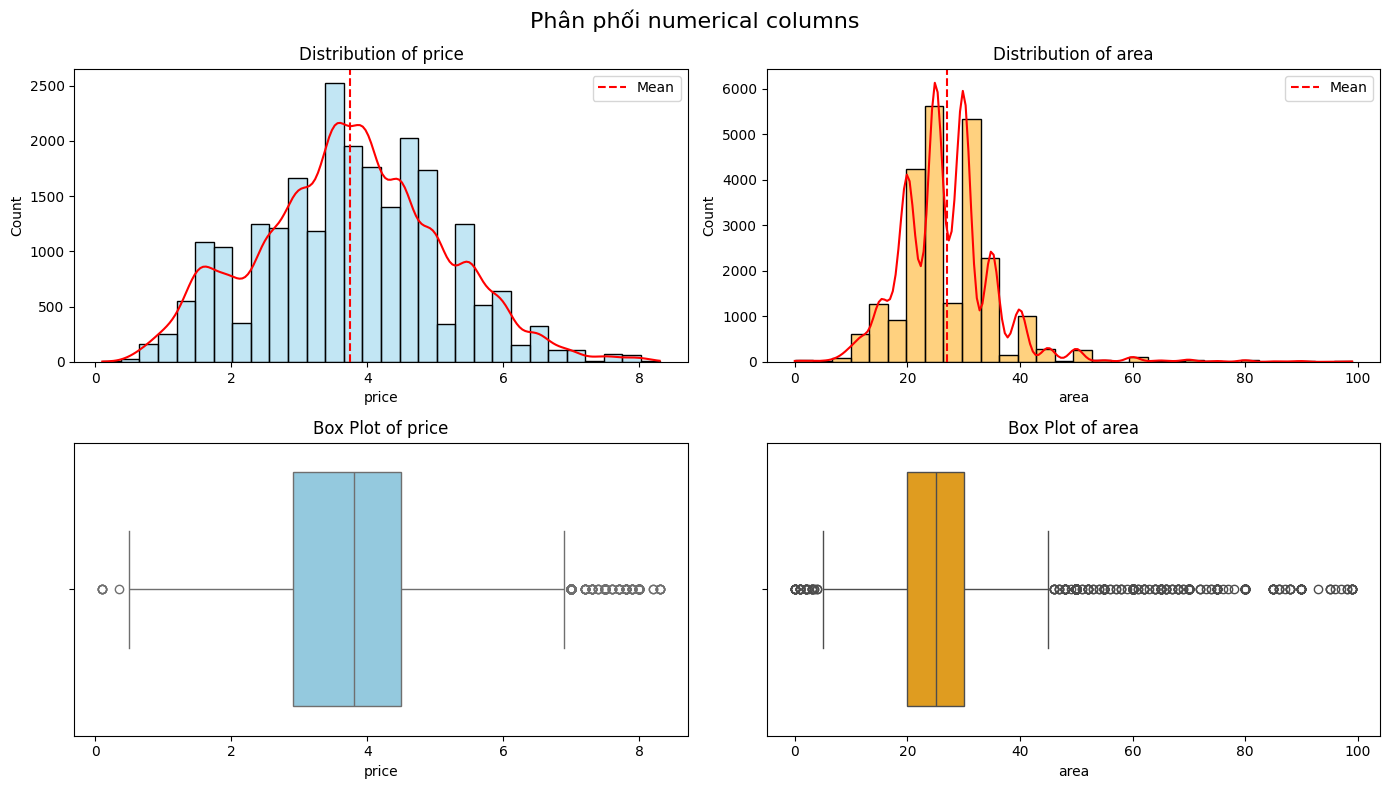

In [25]:
numerical_cols = ['price','area']
summary = []
for name_col in numerical_cols:
    col = df[name_col]
    mean_val = round(col.mean(),2)
    median_val = round(col.median(),2)
    std_val = round(col.std(),2)
    skew_val = round(col.skew(),2)
    if skew_val > 1: 
        shape = "Lệch phải"
    elif skew_val < -1: 
        shape = "Lệch trái"
    else: 
        shape = "Đối xứng"

    min_val = col.min()
    max_val = col.max()
    
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(col < lower_bound) | (col > upper_bound)]
    num_outliers = len(outliers)
    percent_outliers = num_outliers / len(df) * 100

    num_missing = col.isnull().sum()
    pct_missing = num_missing/len(df) * 100.0 
    num_impossible = (col <= 0).sum()
    placeholders_found = []
    for p_val in [0, -1, 999]:
        if (col == p_val).any():
            placeholders_found.append(str(p_val))
    
    placeholder_note = ", ".join(placeholders_found) if placeholders_found else "None"
    summary.append({
        "Column": name_col,
        "Mean": mean_val,
        "Median": median_val,
        "Std": std_val,
        "Skew": skew_val,
        "Shape": shape,
        "Min": min_val,
        "Max": max_val,
        "Lower Bound": round(lower_bound, 2),
        "Upper Bound": round(upper_bound, 2),
        "Outliers Count": num_outliers,
        "Percentage outliers": f"{percent_outliers:.2f}%",
        "Missing (%)": f"{pct_missing:.2f}%",
        "Impossible (<=0)": num_impossible,
        "Placeholders": placeholder_note,
    })
summary_df = pd.DataFrame(summary)
display(summary_df)


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
fig.suptitle('Phân phối numerical columns', fontsize=16)

colors = ['skyblue', 'orange']

for i, col in enumerate(numerical_cols):
    data_viz = df[df[col] < df[col].quantile(0.995)][col] 
    sns.histplot(data_viz, kde=True, ax=axes[0, i], color=colors[i], bins=30)
    axes[0, i].lines[-1].set_color('red')
    axes[0, i].set_title(f'Distribution of {col}')
    axes[0, i].axvline(data_viz.mean(), color='red', linestyle='--', label='Mean')
    axes[0, i].legend()

    sns.boxplot(x=data_viz, ax=axes[1, i], color=colors[i])
    axes[1, i].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()



## 1. Distribution & Central Tendency (Phân Phối & Xu Hướng Tập Trung)

### **Price (Giá thuê)**
* **Distribution Shape:**
    * Phân phối **lệch phải nặng (Right-skewed)** với hệ số Skew $\approx 59.84$.
    * Đuôi phân phối kéo dài về phía giá trị cao, phản ánh sự tồn tại của các bất động sản giá trị rất lớn.
* **Central Tendency:**
    * **Mean:** 3.8 triệu.
    * **Median:** 3.8 triệu.
    * **Nhận xét:** Mặc dù dữ liệu bị lệch (skewed), Mean và Median xấp xỉ bằng nhau. Điều này cho thấy phần lớn dữ liệu tập trung dày đặc quanh mức 3.8 triệu, và các giá trị ngoại lai tuy lớn nhưng số lượng chưa đủ áp đảo để kéo Mean lệch hẳn khỏi Median.

### **Area (Diện tích)**
* **Distribution Shape:**
    * Phân phối **lệch phải (Right-skewed)** với hệ số Skew $\approx 15.91$.
    * Biểu đồ Histogram hiển thị dạng **đa đỉnh (Multimodal)**, với các đỉnh tập trung tại các mốc diện tích chẵn (ví dụ: 20, 25, 30 $m^2$), phản ánh đặc thù xây dựng theo module của phòng trọ/chung cư mini.
* **Central Tendency:**
    * **Mean (28.07 $m^2$) > Median (25.0 $m^2$).**
    * **Nhận xét:** Sự chênh lệch này xác nhận phân phối bị kéo bởi các bất động sản có diện tích lớn (chung cư nguyên căn, nhà ở).


## 2. Range & Outliers (Biên độ & Giá trị Ngoại lai)

### **Range (Biên độ)**
* **Price:** 0.1 - 260 triệu.
    * Min = 0.1 là giá trị đáng ngờ (có thể là lỗi nhập liệu hoặc đơn vị sai).
* **Area:** 0 - 1000 $m^2$.
    * Min = 0 là lỗi dữ liệu chắc chắn.

### **Outliers (Giá trị ngoại lai)**
* **Phương pháp:** IQR Method (Box Plots).
* **Kết quả:**
    * **Price:** 291 outliers (1.21%), ngưỡng trên (Upper Bound) $\approx$ 7.15 triệu.
    * **Area:** 830 outliers (3.46%), ngưỡng trên (Upper Bound) $\approx$ 45 $m^2$.
* **Đánh giá & Phân loại:**
    * **Genuine (Phân khúc cao cấp):** Các giá trị cao **vừa phải** (ví dụ: Price 8-20 triệu, Area 45-80 $m^2$) có khả năng cao là dữ liệu thực (chung cư, nguyên căn).
    * **Suspicious/Errors (Nghi ngờ lỗi):** Các giá trị **cực lớn** ( như Max Price = 260 triệu, Max Area = 1000 $m^2$) có nguy cơ cao là lỗi nhập liệu (thừa số 0, nhầm giá bán, hoặc nhầm diện tích đất).
    * **Hành động:** Cần kiểm tra chéo (Cross-check) cột **Price/Area** (Đơn giá/m2). Nếu đơn giá quá vô lý (quá cao hoặc quá thấp), cần loại bỏ.
## 3. Data Quality (Chất lượng Dữ liệu)

### **Missing Values (Dữ liệu khuyết thiếu)**
* Tỷ lệ rất thấp, không đáng lo ngại:
    * **Price:** 0.25%
    * **Area:** 0.03%

### **Impossible Values (Giá trị phi logic)**
* **Area:** Phát hiện **13 dòng** có giá trị $\le 0$. Đây là dữ liệu rác cần loại bỏ.
* **Price:** Không có giá trị âm, nhưng giá trị thấp nhất 0.1 (có thể là lỗi nhập liệu).

### **Placeholders**
* Số `0` trong cột Area đang được sử dụng như placeholder cho dữ liệu thiếu hoặc lỗi hệ thống.

## **Đề xuất xử lý (Action Plan)**
1.  **Cleaning:** Xóa 13 dòng `Area <= 0` và các dòng `Price` quá thấp (ví dụ < 0.5 triệu) nếu không xác minh được.
2.  **Outlier Handling (Xử lý Ngoại lai):** Áp dụng phương pháp **Cắt bỏ theo ngưỡng (Trimming based on Domain Knowledge)** thay vì giữ lại toàn bộ.
    * **Thiết lập khoảng hợp lý:** Ước lượng khoảng giá và diện tích thực tế cho bài toán (Ví dụ: Price từ 0.5 - 50 triệu, Area từ 3 - 100 $m^2$).
    * **Hành động:** Loại bỏ hoàn toàn các dòng dữ liệu nằm ngoài khoảng này (bao gồm cả các giá trị quá nhỏ là lỗi và giá trị quá lớn nghi ngờ là nhập sai đơn vị). Việc này giúp mô hình tập trung vào phân khúc phổ biến và giảm nhiễu.
3.  **Imputation:** Với tỷ lệ missing < 1%, ưu tiên phương án xóa dòng (drop) để giữ độ sạch của dữ liệu gốc.